# US Accidents Exploratory Data Analysis

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("source\\US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [37]:
df.shape

(7728394, 46)

### Data Cleaning

In [66]:
df.replace('NA', np.nan)

In [67]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Hour', 'Time_of_Day', 'Days', 'Months', 'Duration'],
      dtype='object')

Removing unwanted columns

Running this multiple times can give error 
If you want to execute copy the code and run

``` columns_to_drop = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
    'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
    'Astronomical_Twilight'
]

missing_columns = set(columns_to_drop) - set(df.columns)
print("Missing columns:", missing_columns)


In [68]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Hour', 'Time_of_Day', 'Days', 'Months', 'Duration'],
      dtype='object')

In [69]:
type(df)

pandas.core.frame.DataFrame

In [70]:
df.shape

(7728394, 35)

### 1. General Understanding of the Data

- Are there any missing values in the dataset? If yes, in which columns and how many?

In [42]:
missing_values = df.isnull().sum()


missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print(f"Missing values are present in the following columns:\n{missing_columns}")

Missing values are present in the following columns:
End_Lat              3402762
End_Lng              3402762
Description                5
Street                 10869
City                     253
Zipcode                 1915
Timezone                7808
Airport_Code           22635
Weather_Timestamp     120228
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
dtype: int64


- What are the data types of each column? Are they appropriate, or do they need to be adjusted?

In [43]:
df.dtypes

ID                    object
Source                object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Description           object
Street                object
City                  object
County                object
State                 object
Zipcode               object
Country               object
Timezone              object
Airport_Code          object
Weather_Timestamp     object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
dtype: object

In [44]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [45]:
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [46]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [47]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity'],
      dtype='object')

No other columns seems to be unappropriate regarding data type

- Are there any duplicate rows?

In [48]:
duplicate = df.duplicated()
duplicate

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Length: 7728394, dtype: bool

### 2. Severity and Impact Analysis

- What is the distribution of Severity levels? Which level is the most frequent?

In [49]:
severity_distribution = df['Severity'].value_counts()
severity_distribution

2    6156981
3    1299337
4     204710
1      67366
Name: Severity, dtype: int64

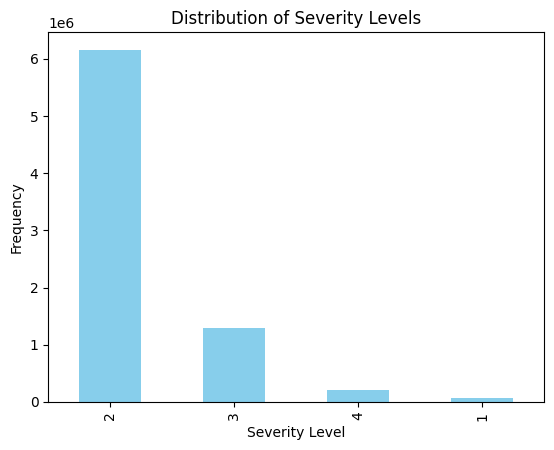

In [50]:
# Plot the distribution
severity_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.show()

- Is there a relationship between Severity and other columns like Weather_Condition, Time of Day, or Distance(mi)?

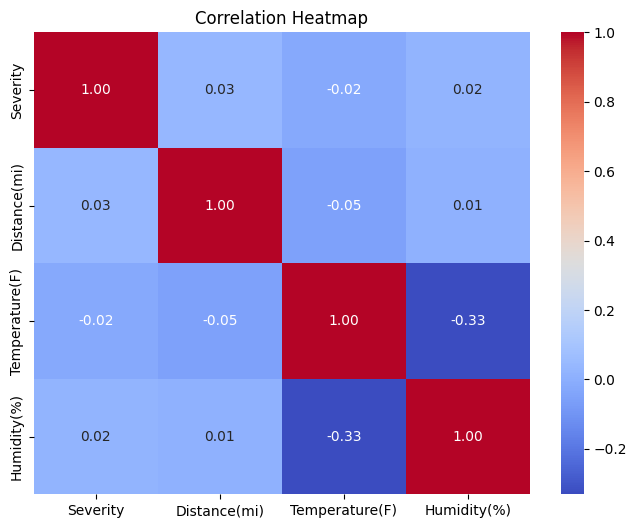

In [51]:
# Correlation heatmap
numerical_cols = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 3. Temporal Analysis

- During which time of day (Start_Time) do most incidents occur (morning, afternoon, evening, night)?

In [52]:
df['Hour'] = df['Start_Time'].dt.hour

In [53]:
def get_time_of_day(hour):
    if 5 <= hour <= 12:
        return "morning"
    elif 12 < hour <= 17:
        return "afternoon"
    elif 17 < hour <= 20:
        return "evening"
    else:
        return "night"
    
df['Time_of_Day'] = df['Hour'].map(get_time_of_day)

In [54]:
time_of_day_distribution = df['Time_of_Day'].value_counts()
time_of_day_distribution

morning      3214848
afternoon    2529130
night        1032027
evening       952389
Name: Time_of_Day, dtype: int64

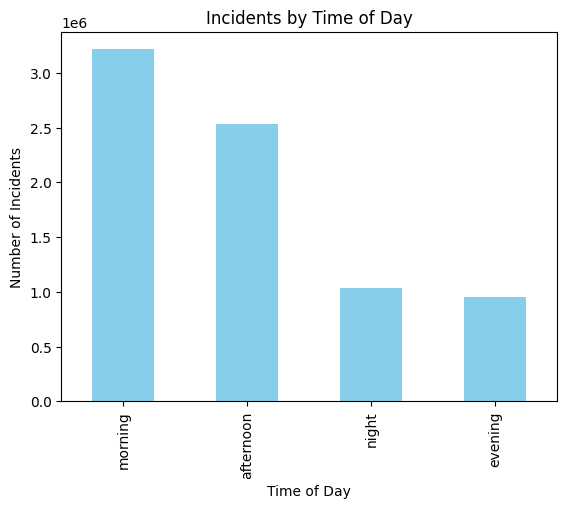

In [55]:
time_of_day_distribution.plot(kind='bar', color='skyblue')
plt.title('Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.show()

- Are there any specific days or months where incidents are more frequent?

In [56]:
df['Days'] = df['Start_Time'].dt.day
df['Months'] = df['Start_Time'].dt.month

In [57]:
specific_days = df['Days'].value_counts()
specific_days

22    277077
23    276906
12    266192
14    264938
16    264611
21    264017
13    263738
15    263674
19    263066
18    262996
11    261781
20    261460
17    257276
8     253358
24    250939
1     248767
6     248515
27    248138
9     247890
7     247747
5     247612
10    247178
2     244995
3     242845
4     242592
28    240474
26    237524
25    232740
30    231731
29    225626
31    141991
Name: Days, dtype: int64

In [58]:
specific_months = df['Months'].value_counts()

df['Months'] = df['Months'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})


specific_months.sort_values(ascending= False)

12    847343
11    760165
1     751946
10    675130
2     658984
9     651381
8     599666
4     587300
6     571373
5     558176
3     554595
7     512335
Name: Months, dtype: int64

- What is the average duration of incidents (End_Time - Start_Time)?

In [59]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

average_duration = df['Duration'].mean()

print(f"Average Duration: {average_duration:.2f} minutes")

Average Duration: 444.42 minutes
